In [ ]:
### Code contains analysis for generating pathway scoring of identified temporal clusters of downregulated DGEs in old vs young mice at day 37 shown in Extended Data Figure 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import ma_codes as codes
from ma_codes import mysize, gray_red, mymap
import pertpy as pt
%matplotlib inline
import math

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

import warnings
warnings.filterwarnings("ignore")

/home/michaelammeter/miniconda3/envs/pertpy/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Running Scanpy 1.10.2, on 2024-11-22 14:21.


In [2]:
plot_folder = "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/"

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42

In [3]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "230111_Bleo_Ageing_annotated_final.h5ad")

In [4]:
def Convert(string):
    li = list(string.split(","))
    return li

In [5]:
import rpy2
%load_ext rpy2.ipython

In [6]:
%%R
library(ggplot2)
library(gdata)
library(tidyr)
library(pheatmap)
library(tibble)
library(msigdbr)
library(dplyr)


Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘tidyr’

The following object is masked from ‘package:gdata’:

    starts_with


Attaching package: ‘dplyr’

The following objects are masked from ‘package:gdata’:

    combine, first, last, starts_with

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [7]:
%%R
all_gene_sets = msigdbr(species = "Mus musculus")

In [8]:
%%R
hallmark_gene_sets = msigdbr(species = "mouse", category = "H")
#head(hallmark_gene_sets)

In [9]:
%%R
hallmark_table <- hallmark_gene_sets %>% dplyr::distinct(gs_name, gene_symbol) %>% as.data.frame()
#head(hallmark_table)

In [10]:
%%R
write.csv(hallmark_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/msigdb_mouse_hallmark_gene_sets.csv",
                     row.names = FALSE)

In [11]:
hallmark_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/msigdb_mouse_hallmark_gene_sets.csv")
#hallmark_table.head()

In [12]:
output_path = "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/"

In [13]:
HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
res = sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")
res

computing score 'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
    finished: added
    'HALLMARK_OXIDATIVE_PHOSPHORYLATION', score of gene set (adata.obs).
    591 total control genes are used. (0:00:00)


In [14]:
import os
os.chdir("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/")

computing score 'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
    finished: added
    'HALLMARK_OXIDATIVE_PHOSPHORYLATION', score of gene set (adata.obs).
    591 total control genes are used. (0:00:00)
computing score 'HALLMARK_ADIPOGENESIS'
    finished: added
    'HALLMARK_ADIPOGENESIS', score of gene set (adata.obs).
    745 total control genes are used. (0:00:00)


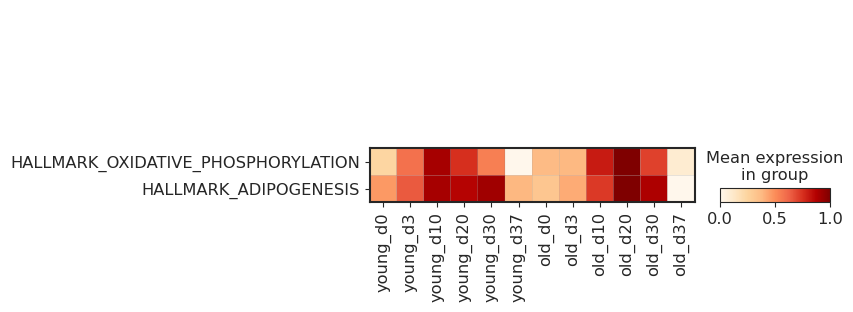

In [15]:
# Cluster 1
# MSigDB
HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_OXIDATIVE_PHOSPHORYLATION", "HALLMARK_ADIPOGENESIS"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd", 
                 #save = "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_1_msigdb.pdf",
                save = "cluster_1_msigdb.pdf"

                )

computing score 'HALLMARK_GLYCOLYSIS'
    finished: added
    'HALLMARK_GLYCOLYSIS', score of gene set (adata.obs).
    1092 total control genes are used. (0:00:00)
computing score 'HALLMARK_P53_PATHWAY'
    finished: added
    'HALLMARK_P53_PATHWAY', score of gene set (adata.obs).
    840 total control genes are used. (0:00:00)
computing score 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION'
    finished: added
    'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', score of gene set (adata.obs).
    1047 total control genes are used. (0:00:00)


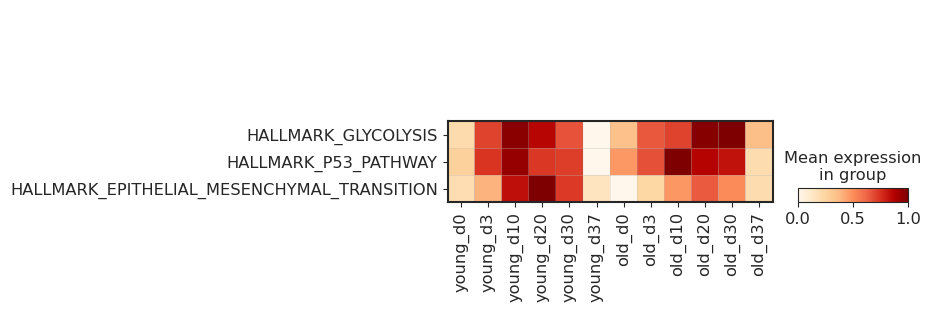

In [16]:
# Cluster 3
# MSigDb
HALLMARK_GLYCOLYSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_GLYCOLYSIS"]
HALLMARK_GLYCOLYSIS = HALLMARK_GLYCOLYSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_GLYCOLYSIS, score_name = "HALLMARK_GLYCOLYSIS")

HALLMARK_P53_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_P53_PATHWAY"]
HALLMARK_P53_PATHWAY = HALLMARK_P53_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_P53_PATHWAY, score_name = "HALLMARK_P53_PATHWAY")

HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"]
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, score_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_GLYCOLYSIS", "HALLMARK_P53_PATHWAY", "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_ALLOGRAFT_REJECTION'
    finished: added
    'HALLMARK_ALLOGRAFT_REJECTION', score of gene set (adata.obs).
    940 total control genes are used. (0:00:00)
computing score 'HALLMARK_ADIPOGENESIS'
    finished: added
    'HALLMARK_ADIPOGENESIS', score of gene set (adata.obs).
    745 total control genes are used. (0:00:00)
computing score 'HALLMARK_COMPLEMENT'
    finished: added
    'HALLMARK_COMPLEMENT', score of gene set (adata.obs).
    1040 total control genes are used. (0:00:00)
computing score 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'
    finished: added
    'HALLMARK_TNFA_SIGNALING_VIA_NFKB', score of gene set (adata.obs).
    786 total control genes are used. (0:00:00)


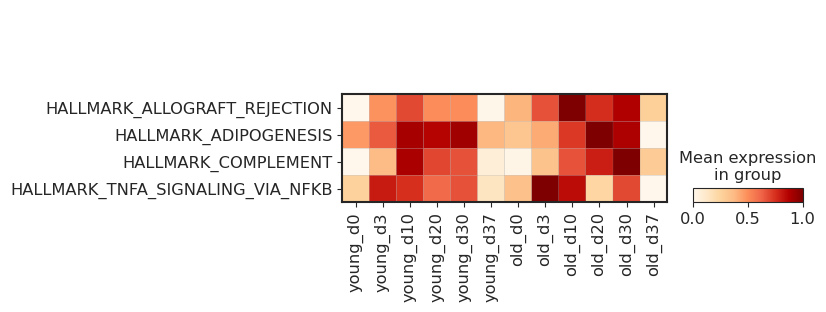

In [17]:
# Cluster 5
# MSigDB
HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_COMPLEMENT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_COMPLEMENT"]
HALLMARK_COMPLEMENT = HALLMARK_COMPLEMENT["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_COMPLEMENT, score_name = "HALLMARK_COMPLEMENT")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_ALLOGRAFT_REJECTION", "HALLMARK_ADIPOGENESIS", "HALLMARK_COMPLEMENT", "HALLMARK_TNFA_SIGNALING_VIA_NFKB"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY'
    finished: added
    'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY', score of gene set (adata.obs).
    449 total control genes are used. (0:00:00)
computing score 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'
    finished: added
    'HALLMARK_TNFA_SIGNALING_VIA_NFKB', score of gene set (adata.obs).
    786 total control genes are used. (0:00:00)
computing score 'HALLMARK_ADIPOGENESIS'
    finished: added
    'HALLMARK_ADIPOGENESIS', score of gene set (adata.obs).
    745 total control genes are used. (0:00:00)
computing score 'HALLMARK_APICAL_JUNCTION'
    finished: added
    'HALLMARK_APICAL_JUNCTION', score of gene set (adata.obs).
    1147 total control genes are used. (0:00:00)


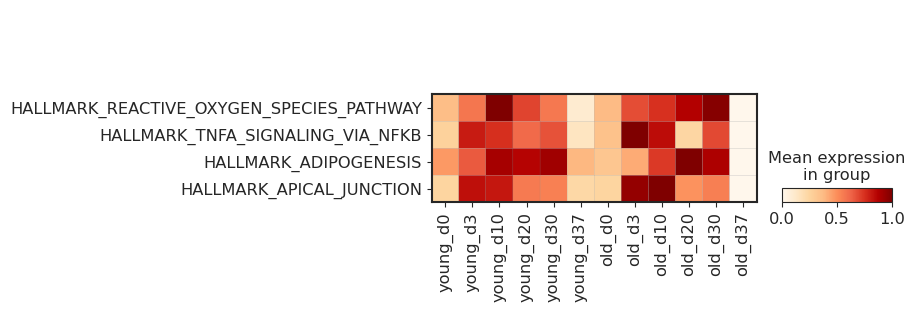

In [18]:
# Cluster 6 
# MSigDB
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_APICAL_JUNCTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APICAL_JUNCTION"]
HALLMARK_APICAL_JUNCTION = HALLMARK_APICAL_JUNCTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_APICAL_JUNCTION, score_name = "HALLMARK_APICAL_JUNCTION")
"HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY", "HALLMARK_TNFA_SIGNALING_VIA_NFKB", "HALLMARK_ADIPOGENESIS", "HALLMARK_APICAL_JUNCTION"

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY", "HALLMARK_TNFA_SIGNALING_VIA_NFKB", "HALLMARK_ADIPOGENESIS", "HALLMARK_APICAL_JUNCTION"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_APOPTOSIS'
    finished: added
    'HALLMARK_APOPTOSIS', score of gene set (adata.obs).
    449 total control genes are used. (0:00:00)
computing score 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'
    finished: added
    'HALLMARK_TNFA_SIGNALING_VIA_NFKB', score of gene set (adata.obs).
    786 total control genes are used. (0:00:00)


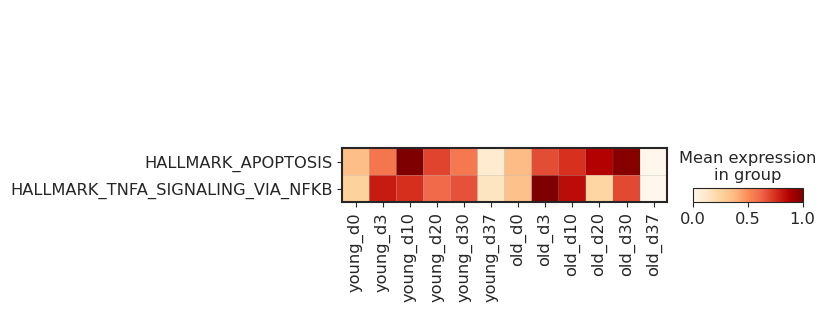

In [19]:
# Cluster 7
# MSigDB
HALLMARK_APOPTOSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APOPTOSIS"]
HALLMARK_APOPTOSIS = HALLMARK_APOPTOSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_APOPTOSIS")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_APOPTOSIS", "HALLMARK_TNFA_SIGNALING_VIA_NFKB"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_XENOBIOTIC_METABOLISM'
       'Hrg', 'Igfbp1', 'Marchf6', 'Mbl2', 'Tyr'],
      dtype='object')
    finished: added
    'HALLMARK_XENOBIOTIC_METABOLISM', score of gene set (adata.obs).
    1038 total control genes are used. (0:00:00)
computing score 'HALLMARK_ANDROGEN_RESPONSE'
       'Nkx3-1'],
      dtype='object')
    finished: added
    'HALLMARK_ANDROGEN_RESPONSE', score of gene set (adata.obs).
    896 total control genes are used. (0:00:00)
computing score 'HALLMARK_HYPOXIA'
    finished: added
    'HALLMARK_HYPOXIA', score of gene set (adata.obs).
    1091 total control genes are used. (0:00:00)
computing score 'HALLMARK_ALLOGRAFT_REJECTION'
    finished: added
    'HALLMARK_ALLOGRAFT_REJECTION', score of gene set (adata.obs).
    940 total control genes are used. (0:00:00)


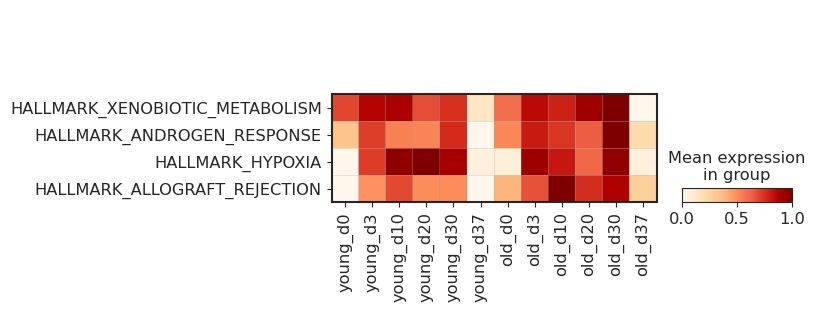

In [20]:
# Cluster 8
# MSigDB
HALLMARK_XENOBIOTIC_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_XENOBIOTIC_METABOLISM"]
HALLMARK_XENOBIOTIC_METABOLISM = HALLMARK_XENOBIOTIC_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_XENOBIOTIC_METABOLISM, score_name = "HALLMARK_XENOBIOTIC_METABOLISM")

HALLMARK_ANDROGEN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ANDROGEN_RESPONSE"]
HALLMARK_ANDROGEN_RESPONSE = HALLMARK_ANDROGEN_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ANDROGEN_RESPONSE, score_name = "HALLMARK_ANDROGEN_RESPONSE")

HALLMARK_HYPOXIA = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_HYPOXIA"]
HALLMARK_HYPOXIA = HALLMARK_HYPOXIA["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_HYPOXIA, score_name = "HALLMARK_HYPOXIA")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_XENOBIOTIC_METABOLISM", "HALLMARK_ANDROGEN_RESPONSE", "HALLMARK_HYPOXIA", "HALLMARK_ALLOGRAFT_REJECTION"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_COAGULATION'
    finished: added
    'HALLMARK_COAGULATION', score of gene set (adata.obs).
    1097 total control genes are used. (0:00:00)
computing score 'HALLMARK_IL2_STAT5_SIGNALING'
    finished: added
    'HALLMARK_IL2_STAT5_SIGNALING', score of gene set (adata.obs).
    891 total control genes are used. (0:00:00)


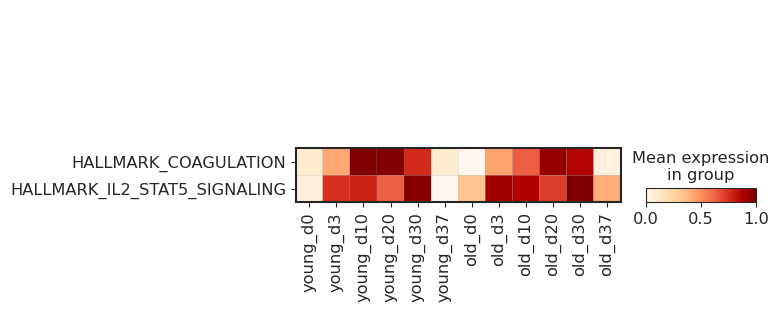

In [21]:
# Cluster 10 
# MSigDB
HALLMARK_COAGULATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_COAGULATION"]
HALLMARK_COAGULATION = HALLMARK_COAGULATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_COAGULATION, score_name = "HALLMARK_COAGULATION")

HALLMARK_IL2_STAT5_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_IL2_STAT5_SIGNALING"]
HALLMARK_IL2_STAT5_SIGNALING = HALLMARK_IL2_STAT5_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_IL2_STAT5_SIGNALING, score_name = "HALLMARK_IL2_STAT5_SIGNALING")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_COAGULATION", "HALLMARK_IL2_STAT5_SIGNALING"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_ADIPOGENESIS'
    finished: added
    'HALLMARK_ADIPOGENESIS', score of gene set (adata.obs).
    745 total control genes are used. (0:00:00)
computing score 'HALLMARK_HEME_METABOLISM'
       'Slc30a10', 'Slc66a2', 'Tyr'],
      dtype='object')
    finished: added
    'HALLMARK_HEME_METABOLISM', score of gene set (adata.obs).
    1042 total control genes are used. (0:00:00)
computing score 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY'
    finished: added
    'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY', score of gene set (adata.obs).
    449 total control genes are used. (0:00:00)
computing score 'HALLMARK_FATTY_ACID_METABOLISM'
    finished: added
    'HALLMARK_FATTY_ACID_METABOLISM', score of gene set (adata.obs).
    991 total control genes are used. (0:00:00)


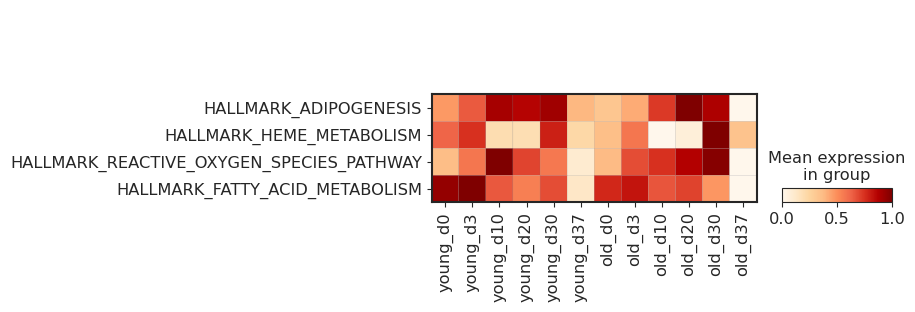

In [22]:
# Cluster 11
# MSigDB
HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_HEME_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_HEME_METABOLISM"]
HALLMARK_HEME_METABOLISM = HALLMARK_HEME_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_HEME_METABOLISM, score_name = "HALLMARK_HEME_METABOLISM")

HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY")

HALLMARK_FATTY_ACID_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_FATTY_ACID_METABOLISM"]
HALLMARK_FATTY_ACID_METABOLISM = HALLMARK_FATTY_ACID_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_FATTY_ACID_METABOLISM, score_name = "HALLMARK_FATTY_ACID_METABOLISM")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_ADIPOGENESIS", "HALLMARK_HEME_METABOLISM", "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY",
                         "HALLMARK_FATTY_ACID_METABOLISM"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

### GO Pathways

In [24]:
%%R
library("org.Mm.eg.db")

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:gdata’:

    combine

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Biocond

In [25]:
%%R
columns(org.Mm.eg.db)

 [1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MGI"         
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROSITE"      "REFSEQ"       "SYMBOL"       "UNIPROT"     


In [26]:
%%R
c1_gene_table <- select(org.Mm.eg.db, keys = c("GO:0019646", "GO:0045333"), columns = "SYMBOL", keytype = "GO")
c2_gene_table <- select(org.Mm.eg.db, keys = c("GO:0008380", "GO:0090169", "GO:0032386"), columns = "SYMBOL", keytype = "GO")
c3_gene_table <- select(org.Mm.eg.db, keys = c("GO:0090158", "GO:0085029", "GO:0019722"), columns = "SYMBOL", keytype = "GO")
c4_gene_table <- select(org.Mm.eg.db, keys = c("GO:0022408", "GO:0019511"), columns = "SYMBOL", keytype = "GO")
c5_gene_table <- select(org.Mm.eg.db, keys = c("GO:0002283", "GO:0002431", "GO:0002888", "GO:0019221"), columns = "SYMBOL", keytype = "GO")
c6_gene_table <- select(org.Mm.eg.db, keys = c("GO:0097084", "GO:0048514", "GO:0001570", "GO:0043116"), columns = "SYMBOL", keytype = "GO")
c7_gene_table <- select(org.Mm.eg.db, keys = c("GO:0070486"), columns = "SYMBOL", keytype = "GO")
c9_gene_table <- select(org.Mm.eg.db, keys = c("GO:0006986", "GO:0070585", "GO:0090162"), columns = "SYMBOL", keytype = "GO")
c10_gene_table <- select(org.Mm.eg.db, keys = c("GO:0006898", "GO:0071635", "GO:0060191", "GO:0050679"), columns = "SYMBOL", keytype = "GO")
c11_gene_table <- select(org.Mm.eg.db, keys = c("GO:0006084", "GO:0016126", "GO:0031579", "GO:2000181"), columns = "SYMBOL", keytype = "GO")

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


In [27]:
%%R
select(org.Mm.eg.db, keys = c("GO:0002693"), columns = "SYMBOL", keytype = "GO")

           GO EVIDENCE ONTOLOGY SYMBOL
1  GO:0002693      IBA       BP  Adam8
2  GO:0002693      IMP       BP  Adam8
3  GO:0002693      IEA       BP  Icam1
4  GO:0002693      ISO       BP  Icam1
5  GO:0002693      ISO       BP Pecam1
6  GO:0002693      IEA       BP  Ptafr
7  GO:0002693      ISO       BP  Ptafr
8  GO:0002693      IEA       BP   Ccl2
9  GO:0002693      ISO       BP   Ccl2
10 GO:0002693      IEA       BP   Thy1
11 GO:0002693      ISO       BP   Thy1
12 GO:0002693      IBA       BP  Plvap
13 GO:0002693      IMP       BP  Plvap
14 GO:0002693      ISO       BP  Plvap
15 GO:0002693      IEA       BP  Lyve1
16 GO:0002693      ISO       BP  Lyve1


'select()' returned 1:many mapping between keys and columns


In [28]:
%%R
write.csv(c1_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_1_go_gene_sets.csv", row.names = FALSE)
write.csv(c2_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_2_go_gene_sets.csv", row.names = FALSE)
write.csv(c3_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_3_go_gene_sets.csv", row.names = FALSE)
write.csv(c4_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_4_go_gene_sets.csv", row.names = FALSE)
write.csv(c5_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_5_go_gene_sets.csv", row.names = FALSE)
write.csv(c6_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_6_go_gene_sets.csv", row.names = FALSE)
write.csv(c7_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_7_go_gene_sets.csv", row.names = FALSE)
write.csv(c9_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_9_go_gene_sets.csv", row.names = FALSE)
write.csv(c10_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_10_go_gene_sets.csv", row.names = FALSE)
write.csv(c11_gene_table, "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_11_go_gene_sets.csv", row.names = FALSE)


In [29]:
c1_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_1_go_gene_sets.csv")
c2_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_2_go_gene_sets.csv")
c3_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_3_go_gene_sets.csv")
c4_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_4_go_gene_sets.csv")
c5_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_5_go_gene_sets.csv")
c6_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_6_go_gene_sets.csv")
c7_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_7_go_gene_sets.csv")
c9_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_9_go_gene_sets.csv")
c10_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_10_go_gene_sets.csv")
c11_gene_table = pd.read_csv("/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/cluster_11_go_gene_sets.csv")


computing score 'Acetyl_CoA_Metabolic_Process'
    finished: added
    'Acetyl_CoA_Metabolic_Process', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)
computing score 'Sterol_Biosynthetic_Process'
    finished: added
    'Sterol_Biosynthetic_Process', score of gene set (adata.obs).
    350 total control genes are used. (0:00:00)
computing score 'Membrane_Raft_Organization'
    finished: added
    'Membrane_Raft_Organization', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)


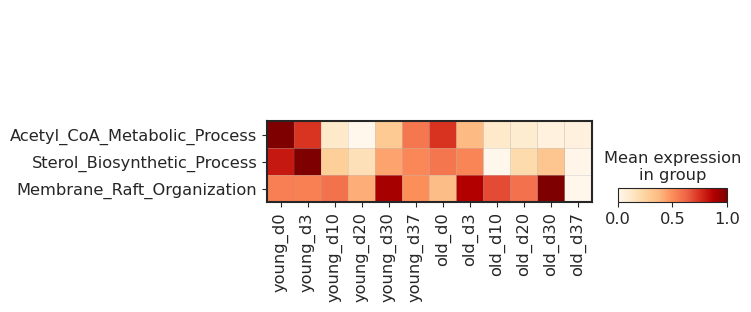

In [30]:
# Cluster 11
# Gene Ontology
Acetyl_CoA_Metabolic_Process = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0006084"]
Acetyl_CoA_Metabolic_Process = Acetyl_CoA_Metabolic_Process["SYMBOL"].values.tolist()
Acetyl_CoA_Metabolic_Process = list(set(Acetyl_CoA_Metabolic_Process))
sc.tl.score_genes(adata, gene_list = Acetyl_CoA_Metabolic_Process, score_name = "Acetyl_CoA_Metabolic_Process")

Sterol_Biosynthetic_Process = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0016126"]
Sterol_Biosynthetic_Process = Sterol_Biosynthetic_Process["SYMBOL"].values.tolist()
Sterol_Biosynthetic_Process = list(set(Sterol_Biosynthetic_Process))
sc.tl.score_genes(adata, gene_list = Sterol_Biosynthetic_Process, score_name = "Sterol_Biosynthetic_Process")

Membrane_Raft_Organization = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0031579"]
Membrane_Raft_Organization = Membrane_Raft_Organization["SYMBOL"].values.tolist()
Membrane_Raft_Organization = list(set(Membrane_Raft_Organization))
sc.tl.score_genes(adata, gene_list = Membrane_Raft_Organization, score_name = "Membrane_Raft_Organization")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Acetyl_CoA_Metabolic_Process", "Sterol_Biosynthetic_Process", "Membrane_Raft_Organization"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

## MSigDB + GO Summary Heatmap

In [31]:
gene_name = "mt-Co3"

# Check if the gene is in the adata object
if gene_name in adata.var_names:
    print(f"{gene_name} is in the adata object.")
else:
    print(f"{gene_name} is not in the adata object.")

mt-Co3 is in the adata object.


computing score 'Cellular_Respiration_(GO:0045333)'
    finished: added
    'Cellular_Respiration_(GO:0045333)', score of gene set (adata.obs).
    549 total control genes are used. (0:00:00)
computing score 'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
    finished: added
    'HALLMARK_OXIDATIVE_PHOSPHORYLATION', score of gene set (adata.obs).
    591 total control genes are used. (0:00:00)
computing score 'HALLMARK_ADIPOGENESIS'
    finished: added
    'HALLMARK_ADIPOGENESIS', score of gene set (adata.obs).
    745 total control genes are used. (0:00:00)
computing score 'RNA_Splicing_GO:0008380'
    finished: added
    'RNA_Splicing_GO:0008380', score of gene set (adata.obs).
    744 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Spindel_Assembly_(GO:0090169)'
    finished: added
    'Regulation_Of_Spindel_Assembly_(GO:0090169)', score of gene set (adata.obs).
    99 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Intracellular_Transport_(GO:0032

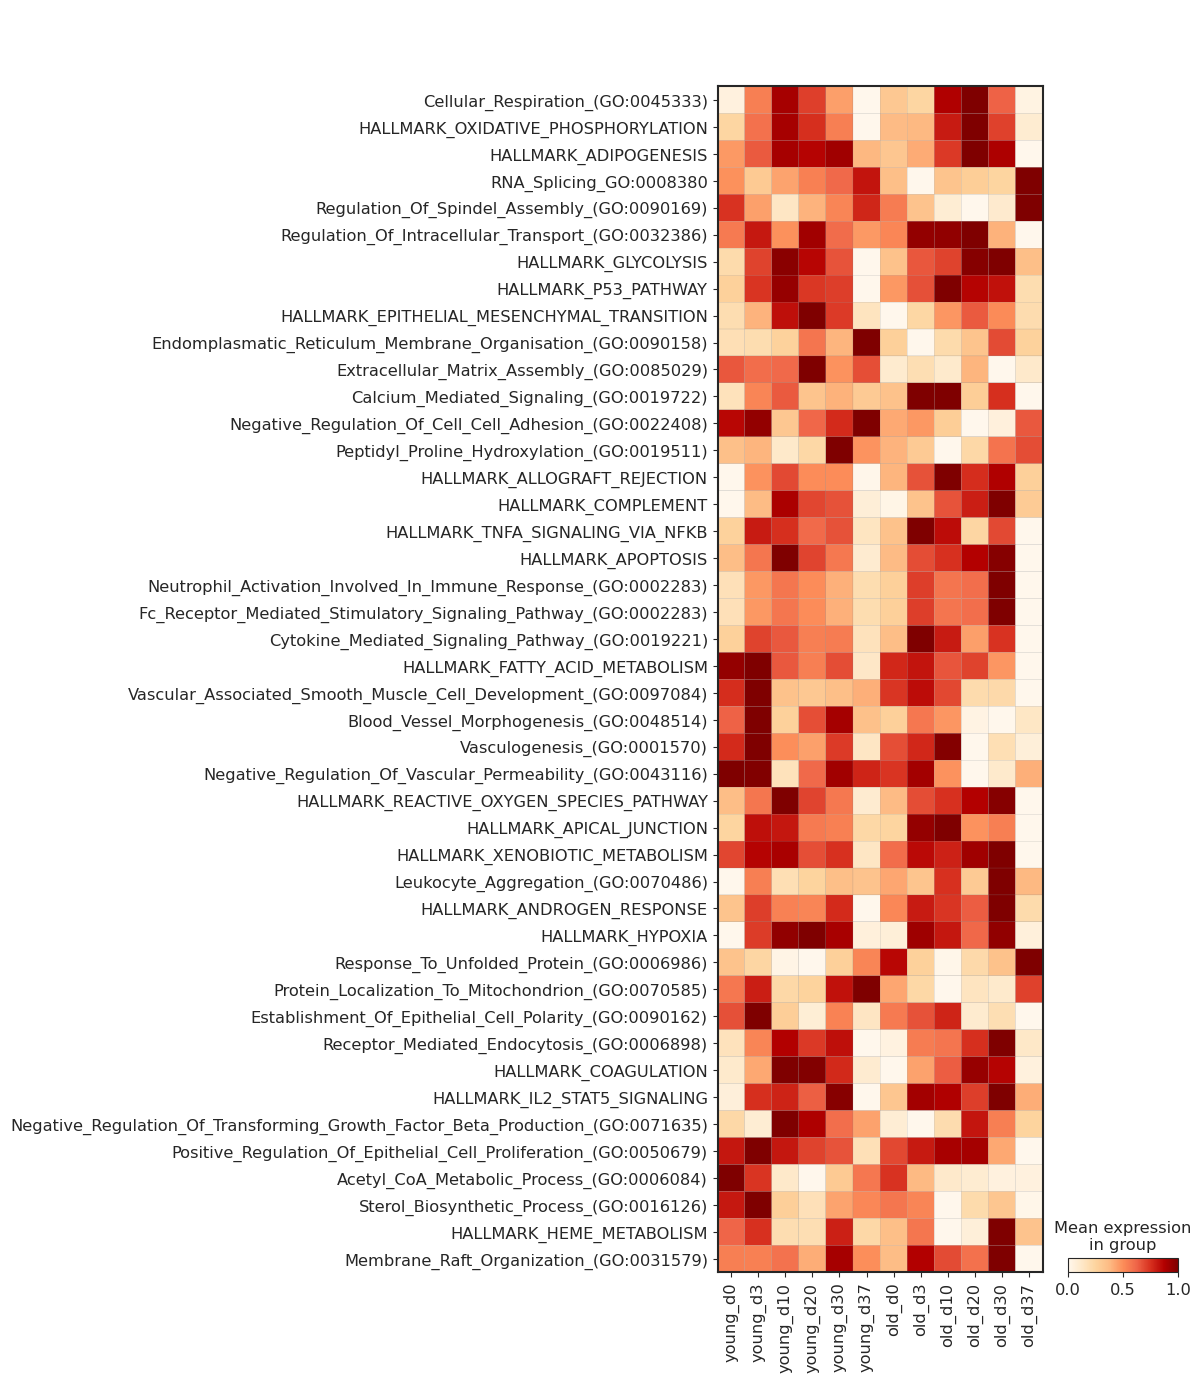

In [32]:
# Cluster 1
#Aerobic_Electron_Transport_Chain = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0019646"] mt-Co3
#Aerobic_Electron_Transport_Chain = Aerobic_Electron_Transport_Chain["SYMBOL"].values.tolist()
#Aerobic_Electron_Transport_Chain = list(set(Aerobic_Electron_Transport_Chain))
#sc.tl.score_genes(adata, gene_list = Aerobic_Electron_Transport_Chain, score_name = "Aerobic_Electron_Transport_Chain")

Cellular_Respiration = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0045333"]
Cellular_Respiration = Cellular_Respiration["SYMBOL"].values.tolist()
Cellular_Respiration = list(set(Cellular_Respiration))
sc.tl.score_genes(adata, gene_list = Cellular_Respiration, score_name = "Cellular_Respiration_(GO:0045333)")

HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

# Cluster 2
RNA_Splicing = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0008380"]
RNA_Splicing = RNA_Splicing["SYMBOL"].values.tolist()
RNA_Splicing = list(set(RNA_Splicing))
sc.tl.score_genes(adata, gene_list = RNA_Splicing, score_name = "RNA_Splicing_GO:0008380") 

Regulation_Of_Spindel_Assembly = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0090169"]
Regulation_Of_Spindel_Assembly = Regulation_Of_Spindel_Assembly["SYMBOL"].values.tolist()
Regulation_Of_Spindel_Assembly = list(set(Regulation_Of_Spindel_Assembly))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Spindel_Assembly, score_name = "Regulation_Of_Spindel_Assembly_(GO:0090169)")

Regulation_Of_Intracellular_Transport = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0032386"]
Regulation_Of_Intracellular_Transport = Regulation_Of_Intracellular_Transport["SYMBOL"].values.tolist()
Regulation_Of_Intracellular_Transport = list(set(Regulation_Of_Intracellular_Transport))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Intracellular_Transport, score_name = "Regulation_Of_Intracellular_Transport_(GO:0032386)")
                  
# Cluster 3
Endomplasmatic_Reticulum_Membrane_Organisation = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0090158"]
Endomplasmatic_Reticulum_Membrane_Organisation = Endomplasmatic_Reticulum_Membrane_Organisation["SYMBOL"].values.tolist()
Endomplasmatic_Reticulum_Membrane_Organisation = list(set(Endomplasmatic_Reticulum_Membrane_Organisation))
sc.tl.score_genes(adata, gene_list = Endomplasmatic_Reticulum_Membrane_Organisation, score_name = "Endomplasmatic_Reticulum_Membrane_Organisation_(GO:0090158)")

Extracellular_Matrix_Assembly = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0085029"]
Extracellular_Matrix_Assembly = Extracellular_Matrix_Assembly["SYMBOL"].values.tolist()
Extracellular_Matrix_Assembly = list(set(Extracellular_Matrix_Assembly))
sc.tl.score_genes(adata, gene_list = Extracellular_Matrix_Assembly, score_name = "Extracellular_Matrix_Assembly_(GO:0085029)")

Calcium_Mediated_Signaling = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0019722"]
Calcium_Mediated_Signaling = Calcium_Mediated_Signaling["SYMBOL"].values.tolist()
Calcium_Mediated_Signaling = list(set(Calcium_Mediated_Signaling))
sc.tl.score_genes(adata, gene_list = Calcium_Mediated_Signaling, score_name = "Calcium_Mediated_Signaling_(GO:0019722)")

HALLMARK_GLYCOLYSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_GLYCOLYSIS"]
HALLMARK_GLYCOLYSIS = HALLMARK_GLYCOLYSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_GLYCOLYSIS, score_name = "HALLMARK_GLYCOLYSIS")

HALLMARK_P53_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_P53_PATHWAY"]
HALLMARK_P53_PATHWAY = HALLMARK_P53_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_P53_PATHWAY, score_name = "HALLMARK_P53_PATHWAY")

HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"]
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, score_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION")

# Cluster 4
Negative_Regulation_Of_Cell_Cell_Adhesion = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0022408"]
Negative_Regulation_Of_Cell_Cell_Adhesion = Negative_Regulation_Of_Cell_Cell_Adhesion["SYMBOL"].values.tolist()
Negative_Regulation_Of_Cell_Cell_Adhesion = list(set(Negative_Regulation_Of_Cell_Cell_Adhesion))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Cell_Cell_Adhesion, score_name = "Negative_Regulation_Of_Cell_Cell_Adhesion_(GO:0022408)")

Peptidyl_Proline_Hydroxylation = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0019511"]
Peptidyl_Proline_Hydroxylation = Peptidyl_Proline_Hydroxylation["SYMBOL"].values.tolist()
Peptidyl_Proline_Hydroxylation = list(set(Peptidyl_Proline_Hydroxylation))
sc.tl.score_genes(adata, gene_list = Peptidyl_Proline_Hydroxylation, score_name = "Peptidyl_Proline_Hydroxylation_(GO:0019511)")

# Cluster 5
Neutrophil_Activation_Involved_In_Immune_Response = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0002283"]
Neutrophil_Activation_Involved_In_Immune_Response = Neutrophil_Activation_Involved_In_Immune_Response["SYMBOL"].values.tolist()
Neutrophil_Activation_Involved_In_Immune_Response = list(set(Neutrophil_Activation_Involved_In_Immune_Response))
sc.tl.score_genes(adata, gene_list = Neutrophil_Activation_Involved_In_Immune_Response, score_name = "Neutrophil_Activation_Involved_In_Immune_Response_(GO:0002283)")

Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0002283"]
Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway["SYMBOL"].values.tolist()
Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = list(set(Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway, score_name = "Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway_(GO:0002283)")

Cytokine_Mediated_Signaling_Pathway = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0019221"]
Cytokine_Mediated_Signaling_Pathway = Cytokine_Mediated_Signaling_Pathway["SYMBOL"].values.tolist()
Cytokine_Mediated_Signaling_Pathway = list(set(Cytokine_Mediated_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Cytokine_Mediated_Signaling_Pathway, score_name = "Cytokine_Mediated_Signaling_Pathway_(GO:0019221)")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_COMPLEMENT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_COMPLEMENT"]
HALLMARK_COMPLEMENT = HALLMARK_COMPLEMENT["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_COMPLEMENT, score_name = "HALLMARK_COMPLEMENT")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

# Cluster 6
Vascular_Associated_Smooth_Muscle_Cell_Development = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0097084"]
Vascular_Associated_Smooth_Muscle_Cell_Development = Vascular_Associated_Smooth_Muscle_Cell_Development["SYMBOL"].values.tolist()
Vascular_Associated_Smooth_Muscle_Cell_Development = list(set(Vascular_Associated_Smooth_Muscle_Cell_Development))
sc.tl.score_genes(adata, gene_list = Vascular_Associated_Smooth_Muscle_Cell_Development, score_name = "Vascular_Associated_Smooth_Muscle_Cell_Development_(GO:0097084)")

Blood_Vessel_Morphogenesis= c6_gene_table.loc[c6_gene_table["GO"] == "GO:0048514"]
Blood_Vessel_Morphogenesis = Blood_Vessel_Morphogenesis["SYMBOL"].values.tolist()
Blood_Vessel_Morphogenesis = list(set(Blood_Vessel_Morphogenesis))
sc.tl.score_genes(adata, gene_list = Blood_Vessel_Morphogenesis, score_name = "Blood_Vessel_Morphogenesis_(GO:0048514)")

Vasculogenesis = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0001570"]
Vasculogenesis = Vasculogenesis["SYMBOL"].values.tolist()
Vasculogenesis = list(set(Vasculogenesis))
sc.tl.score_genes(adata, gene_list = Vasculogenesis, score_name = "Vasculogenesis_(GO:0001570)")

Negative_Regulation_Of_Vascular_Permeability = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0043116"]
Negative_Regulation_Of_Vascular_Permeability = Negative_Regulation_Of_Vascular_Permeability["SYMBOL"].values.tolist()
Negative_Regulation_Of_Vascular_Permeability = list(set(Negative_Regulation_Of_Vascular_Permeability))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Vascular_Permeability, score_name = "Negative_Regulation_Of_Vascular_Permeability_(GO:0043116)")

HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_APICAL_JUNCTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APICAL_JUNCTION"]
HALLMARK_APICAL_JUNCTION = HALLMARK_APICAL_JUNCTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_APICAL_JUNCTION, score_name = "HALLMARK_APICAL_JUNCTION")


# Cluster 7
Leukocyte_Aggregation = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0070486"]
Leukocyte_Aggregation = Leukocyte_Aggregation["SYMBOL"].values.tolist()
Leukocyte_Aggregation = list(set(Leukocyte_Aggregation))
sc.tl.score_genes(adata, gene_list = Leukocyte_Aggregation, score_name = "Leukocyte_Aggregation_(GO:0070486)")

HALLMARK_APOPTOSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APOPTOSIS"]
HALLMARK_APOPTOSIS = HALLMARK_APOPTOSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_APOPTOSIS")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

# Cluster 8
HALLMARK_XENOBIOTIC_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_XENOBIOTIC_METABOLISM"]
HALLMARK_XENOBIOTIC_METABOLISM = HALLMARK_XENOBIOTIC_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_XENOBIOTIC_METABOLISM, score_name = "HALLMARK_XENOBIOTIC_METABOLISM")

HALLMARK_ANDROGEN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ANDROGEN_RESPONSE"]
HALLMARK_ANDROGEN_RESPONSE = HALLMARK_ANDROGEN_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ANDROGEN_RESPONSE, score_name = "HALLMARK_ANDROGEN_RESPONSE")

HALLMARK_HYPOXIA = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_HYPOXIA"]
HALLMARK_HYPOXIA = HALLMARK_HYPOXIA["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_HYPOXIA, score_name = "HALLMARK_HYPOXIA")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

# Cluster 9
Response_To_Unfolded_Protein = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0006986"]
Response_To_Unfolded_Protein = Response_To_Unfolded_Protein["SYMBOL"].values.tolist()
Response_To_Unfolded_Protein = list(set(Response_To_Unfolded_Protein))
sc.tl.score_genes(adata, gene_list = Response_To_Unfolded_Protein, score_name = "Response_To_Unfolded_Protein_(GO:0006986)")

Protein_Localization_To_Mitochondrion = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0070585"]
Protein_Localization_To_Mitochondrion = Protein_Localization_To_Mitochondrion["SYMBOL"].values.tolist()
Protein_Localization_To_Mitochondrion = list(set(Protein_Localization_To_Mitochondrion))
sc.tl.score_genes(adata, gene_list = Protein_Localization_To_Mitochondrion, score_name = "Protein_Localization_To_Mitochondrion_(GO:0070585)")

Establishment_Of_Epithelial_Cell_Polarity = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0090162"]
Establishment_Of_Epithelial_Cell_Polarity = Establishment_Of_Epithelial_Cell_Polarity["SYMBOL"].values.tolist()
Establishment_Of_Epithelial_Cell_Polarity = list(set(Establishment_Of_Epithelial_Cell_Polarity))
sc.tl.score_genes(adata, gene_list = Establishment_Of_Epithelial_Cell_Polarity, score_name = "Establishment_Of_Epithelial_Cell_Polarity_(GO:0090162)")

# Cluster 10
Receptor_Mediated_Endocytosis = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0006898"]
Receptor_Mediated_Endocytosis = Receptor_Mediated_Endocytosis["SYMBOL"].values.tolist()
Receptor_Mediated_Endocytosis = list(set(Receptor_Mediated_Endocytosis))
sc.tl.score_genes(adata, gene_list = Receptor_Mediated_Endocytosis, score_name = "Receptor_Mediated_Endocytosis_(GO:0006898)")

Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0071635"]
Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production["SYMBOL"].values.tolist()
Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = list(set(Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production, score_name = "Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production_(GO:0071635)")

Positive_Regulation_Of_Epithelial_Cell_Proliferation = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0050679"]
Positive_Regulation_Of_Epithelial_Cell_Proliferation = Positive_Regulation_Of_Epithelial_Cell_Proliferation["SYMBOL"].values.tolist()
Positive_Regulation_Of_Epithelial_Cell_Proliferation = list(set(Positive_Regulation_Of_Epithelial_Cell_Proliferation))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Epithelial_Cell_Proliferation, score_name = "Positive_Regulation_Of_Epithelial_Cell_Proliferation_(GO:0050679)")

HALLMARK_COAGULATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_COAGULATION"]
HALLMARK_COAGULATION = HALLMARK_COAGULATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_COAGULATION, score_name = "HALLMARK_COAGULATION")

HALLMARK_IL2_STAT5_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_IL2_STAT5_SIGNALING"]
HALLMARK_IL2_STAT5_SIGNALING = HALLMARK_IL2_STAT5_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_IL2_STAT5_SIGNALING, score_name = "HALLMARK_IL2_STAT5_SIGNALING")

# Cluster 11
Acetyl_CoA_Metabolic_Process = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0006084"]
Acetyl_CoA_Metabolic_Process = Acetyl_CoA_Metabolic_Process["SYMBOL"].values.tolist()
Acetyl_CoA_Metabolic_Process = list(set(Acetyl_CoA_Metabolic_Process))
sc.tl.score_genes(adata, gene_list = Acetyl_CoA_Metabolic_Process, score_name = "Acetyl_CoA_Metabolic_Process_(GO:0006084)")

Sterol_Biosynthetic_Process = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0016126"]
Sterol_Biosynthetic_Process = Sterol_Biosynthetic_Process["SYMBOL"].values.tolist()
Sterol_Biosynthetic_Process = list(set(Sterol_Biosynthetic_Process))
sc.tl.score_genes(adata, gene_list = Sterol_Biosynthetic_Process, score_name = "Sterol_Biosynthetic_Process_(GO:0016126)")

Membrane_Raft_Organization = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0031579"]
Membrane_Raft_Organization = Membrane_Raft_Organization["SYMBOL"].values.tolist()
Membrane_Raft_Organization = list(set(Membrane_Raft_Organization))
sc.tl.score_genes(adata, gene_list = Membrane_Raft_Organization, score_name = "Membrane_Raft_Organization_(GO:0031579)")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_HEME_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_HEME_METABOLISM"]
HALLMARK_HEME_METABOLISM = HALLMARK_HEME_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_HEME_METABOLISM, score_name = "HALLMARK_HEME_METABOLISM")

HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY")

HALLMARK_FATTY_ACID_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_FATTY_ACID_METABOLISM"]
HALLMARK_FATTY_ACID_METABOLISM = HALLMARK_FATTY_ACID_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_FATTY_ACID_METABOLISM, score_name = "HALLMARK_FATTY_ACID_METABOLISM")

sc.pl.matrixplot(adata, groupby=["age", "day"], 


              var_names=["Cellular_Respiration_(GO:0045333)", "HALLMARK_OXIDATIVE_PHOSPHORYLATION", "HALLMARK_ADIPOGENESIS",
                         "RNA_Splicing_GO:0008380", "Regulation_Of_Spindel_Assembly_(GO:0090169)", "Regulation_Of_Intracellular_Transport_(GO:0032386)",
                         "HALLMARK_GLYCOLYSIS", "HALLMARK_P53_PATHWAY", "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION","Endomplasmatic_Reticulum_Membrane_Organisation_(GO:0090158)", "Extracellular_Matrix_Assembly_(GO:0085029)", "Calcium_Mediated_Signaling_(GO:0019722)", 
                         "Negative_Regulation_Of_Cell_Cell_Adhesion_(GO:0022408)", "Peptidyl_Proline_Hydroxylation_(GO:0019511)",
                         "HALLMARK_ALLOGRAFT_REJECTION",  "HALLMARK_COMPLEMENT","HALLMARK_TNFA_SIGNALING_VIA_NFKB", "HALLMARK_APOPTOSIS","Neutrophil_Activation_Involved_In_Immune_Response_(GO:0002283)", "Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway_(GO:0002283)", "Cytokine_Mediated_Signaling_Pathway_(GO:0019221)", "HALLMARK_FATTY_ACID_METABOLISM", 
                         "Vascular_Associated_Smooth_Muscle_Cell_Development_(GO:0097084)", "Blood_Vessel_Morphogenesis_(GO:0048514)", "Vasculogenesis_(GO:0001570)", "Negative_Regulation_Of_Vascular_Permeability_(GO:0043116)", "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY", "HALLMARK_APICAL_JUNCTION", "HALLMARK_XENOBIOTIC_METABOLISM",
                         "Leukocyte_Aggregation_(GO:0070486)",
                         "HALLMARK_ANDROGEN_RESPONSE", "HALLMARK_HYPOXIA",
                         "Response_To_Unfolded_Protein_(GO:0006986)", "Protein_Localization_To_Mitochondrion_(GO:0070585)", "Establishment_Of_Epithelial_Cell_Polarity_(GO:0090162)",
                         "Receptor_Mediated_Endocytosis_(GO:0006898)", "HALLMARK_COAGULATION","HALLMARK_IL2_STAT5_SIGNALING","Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production_(GO:0071635)", "Positive_Regulation_Of_Epithelial_Cell_Proliferation_(GO:0050679)",
                         "Acetyl_CoA_Metabolic_Process_(GO:0006084)", "Sterol_Biosynthetic_Process_(GO:0016126)", "HALLMARK_HEME_METABOLISM",  "Membrane_Raft_Organization_(GO:0031579)",
                       ],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd",
                save = "cluster_all_msigdb_and_go_pathway_scores.pdf")


### Plot meta label

computing score 'Cellular_Respiration_(GO:0045333)'
    finished: added
    'Cellular_Respiration_(GO:0045333)', score of gene set (adata.obs).
    549 total control genes are used. (0:00:00)
computing score 'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
    finished: added
    'HALLMARK_OXIDATIVE_PHOSPHORYLATION', score of gene set (adata.obs).
    591 total control genes are used. (0:00:00)
computing score 'HALLMARK_ADIPOGENESIS'
    finished: added
    'HALLMARK_ADIPOGENESIS', score of gene set (adata.obs).
    745 total control genes are used. (0:00:00)
computing score 'RNA_Splicing_GO:0008380'
    finished: added
    'RNA_Splicing_GO:0008380', score of gene set (adata.obs).
    744 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Spindel_Assembly_(GO:0090169)'
    finished: added
    'Regulation_Of_Spindel_Assembly_(GO:0090169)', score of gene set (adata.obs).
    99 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Intracellular_Transport_(GO:0032

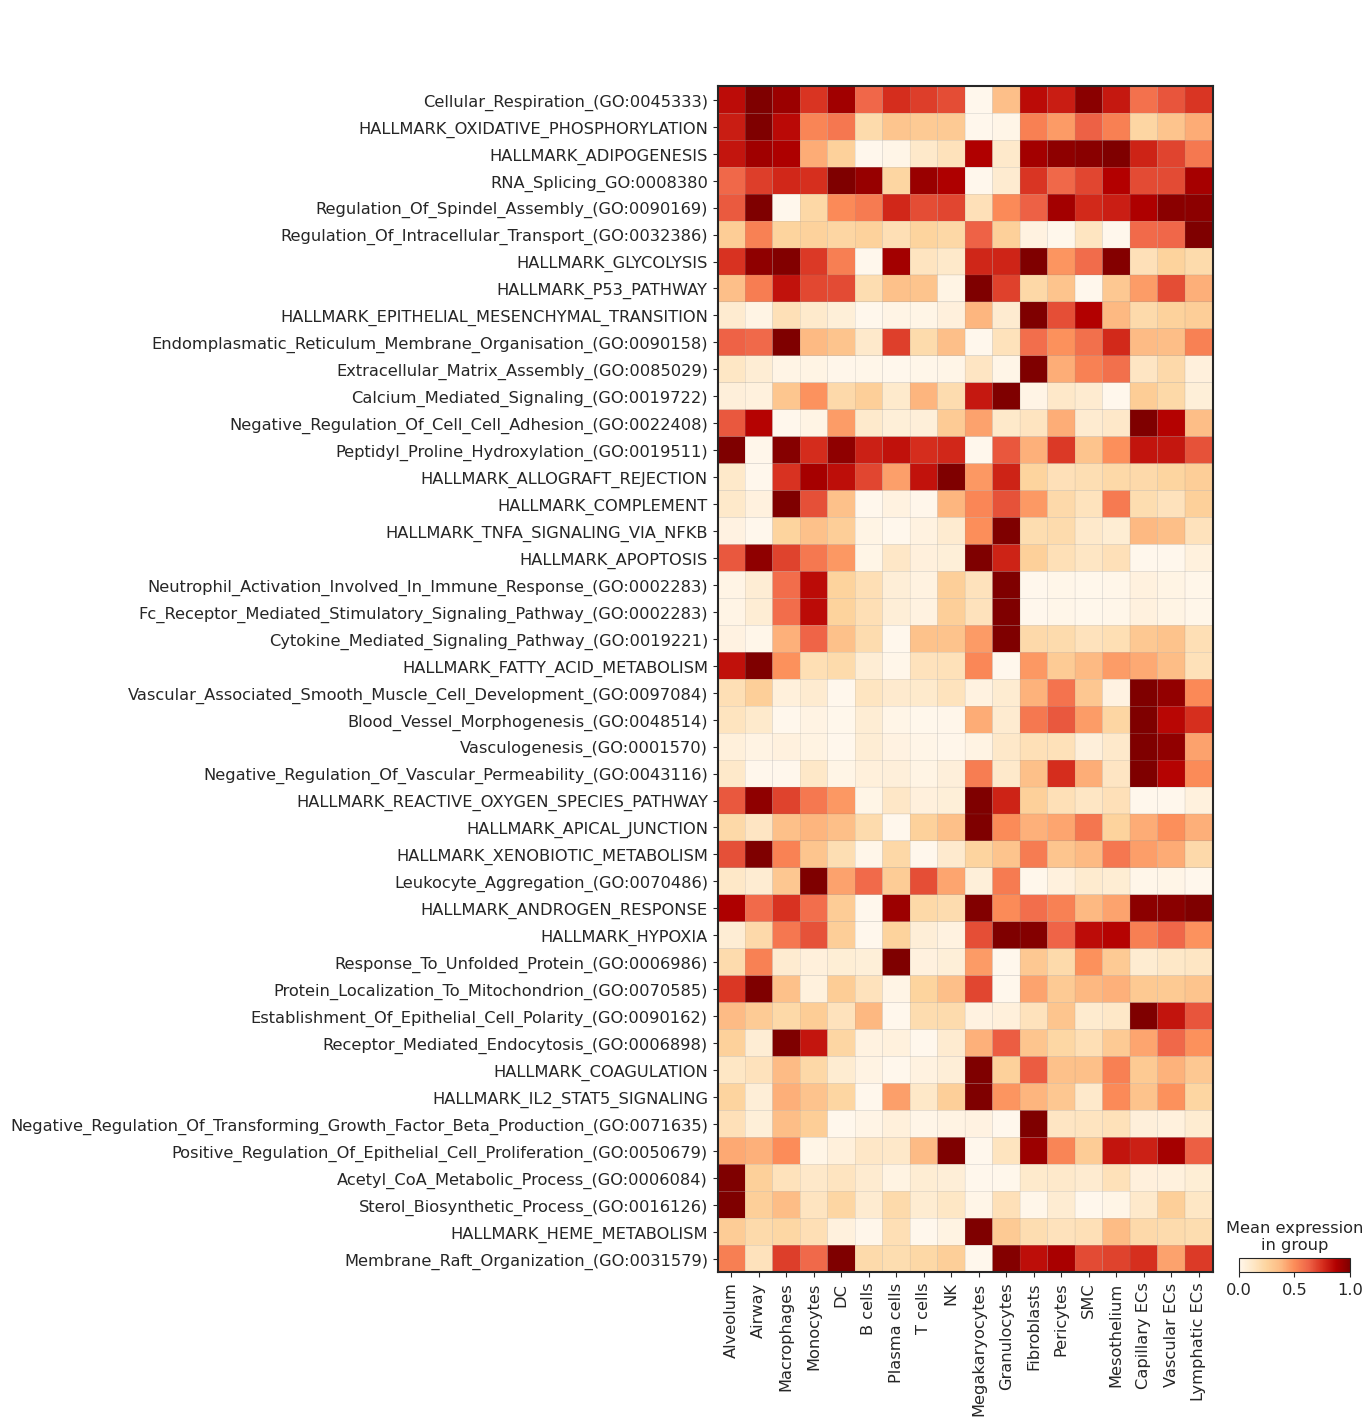

In [33]:
# Cluster 1
#Aerobic_Electron_Transport_Chain = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0019646"] mt-Co3
#Aerobic_Electron_Transport_Chain = Aerobic_Electron_Transport_Chain["SYMBOL"].values.tolist()
#Aerobic_Electron_Transport_Chain = list(set(Aerobic_Electron_Transport_Chain))
#sc.tl.score_genes(adata, gene_list = Aerobic_Electron_Transport_Chain, score_name = "Aerobic_Electron_Transport_Chain")

Cellular_Respiration = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0045333"]
Cellular_Respiration = Cellular_Respiration["SYMBOL"].values.tolist()
Cellular_Respiration = list(set(Cellular_Respiration))
sc.tl.score_genes(adata, gene_list = Cellular_Respiration, score_name = "Cellular_Respiration_(GO:0045333)")

HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

# Cluster 2
RNA_Splicing = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0008380"]
RNA_Splicing = RNA_Splicing["SYMBOL"].values.tolist()
RNA_Splicing = list(set(RNA_Splicing))
sc.tl.score_genes(adata, gene_list = RNA_Splicing, score_name = "RNA_Splicing_GO:0008380") 

Regulation_Of_Spindel_Assembly = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0090169"]
Regulation_Of_Spindel_Assembly = Regulation_Of_Spindel_Assembly["SYMBOL"].values.tolist()
Regulation_Of_Spindel_Assembly = list(set(Regulation_Of_Spindel_Assembly))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Spindel_Assembly, score_name = "Regulation_Of_Spindel_Assembly_(GO:0090169)")

Regulation_Of_Intracellular_Transport = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0032386"]
Regulation_Of_Intracellular_Transport = Regulation_Of_Intracellular_Transport["SYMBOL"].values.tolist()
Regulation_Of_Intracellular_Transport = list(set(Regulation_Of_Intracellular_Transport))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Intracellular_Transport, score_name = "Regulation_Of_Intracellular_Transport_(GO:0032386)")
                  
# Cluster 3
Endomplasmatic_Reticulum_Membrane_Organisation = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0090158"]
Endomplasmatic_Reticulum_Membrane_Organisation = Endomplasmatic_Reticulum_Membrane_Organisation["SYMBOL"].values.tolist()
Endomplasmatic_Reticulum_Membrane_Organisation = list(set(Endomplasmatic_Reticulum_Membrane_Organisation))
sc.tl.score_genes(adata, gene_list = Endomplasmatic_Reticulum_Membrane_Organisation, score_name = "Endomplasmatic_Reticulum_Membrane_Organisation_(GO:0090158)")

Extracellular_Matrix_Assembly = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0085029"]
Extracellular_Matrix_Assembly = Extracellular_Matrix_Assembly["SYMBOL"].values.tolist()
Extracellular_Matrix_Assembly = list(set(Extracellular_Matrix_Assembly))
sc.tl.score_genes(adata, gene_list = Extracellular_Matrix_Assembly, score_name = "Extracellular_Matrix_Assembly_(GO:0085029)")

Calcium_Mediated_Signaling = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0019722"]
Calcium_Mediated_Signaling = Calcium_Mediated_Signaling["SYMBOL"].values.tolist()
Calcium_Mediated_Signaling = list(set(Calcium_Mediated_Signaling))
sc.tl.score_genes(adata, gene_list = Calcium_Mediated_Signaling, score_name = "Calcium_Mediated_Signaling_(GO:0019722)")

HALLMARK_GLYCOLYSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_GLYCOLYSIS"]
HALLMARK_GLYCOLYSIS = HALLMARK_GLYCOLYSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_GLYCOLYSIS, score_name = "HALLMARK_GLYCOLYSIS")

HALLMARK_P53_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_P53_PATHWAY"]
HALLMARK_P53_PATHWAY = HALLMARK_P53_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_P53_PATHWAY, score_name = "HALLMARK_P53_PATHWAY")

HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"]
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, score_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION")

# Cluster 4
Negative_Regulation_Of_Cell_Cell_Adhesion = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0022408"]
Negative_Regulation_Of_Cell_Cell_Adhesion = Negative_Regulation_Of_Cell_Cell_Adhesion["SYMBOL"].values.tolist()
Negative_Regulation_Of_Cell_Cell_Adhesion = list(set(Negative_Regulation_Of_Cell_Cell_Adhesion))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Cell_Cell_Adhesion, score_name = "Negative_Regulation_Of_Cell_Cell_Adhesion_(GO:0022408)")

Peptidyl_Proline_Hydroxylation = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0019511"]
Peptidyl_Proline_Hydroxylation = Peptidyl_Proline_Hydroxylation["SYMBOL"].values.tolist()
Peptidyl_Proline_Hydroxylation = list(set(Peptidyl_Proline_Hydroxylation))
sc.tl.score_genes(adata, gene_list = Peptidyl_Proline_Hydroxylation, score_name = "Peptidyl_Proline_Hydroxylation_(GO:0019511)")

# Cluster 5
Neutrophil_Activation_Involved_In_Immune_Response = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0002283"]
Neutrophil_Activation_Involved_In_Immune_Response = Neutrophil_Activation_Involved_In_Immune_Response["SYMBOL"].values.tolist()
Neutrophil_Activation_Involved_In_Immune_Response = list(set(Neutrophil_Activation_Involved_In_Immune_Response))
sc.tl.score_genes(adata, gene_list = Neutrophil_Activation_Involved_In_Immune_Response, score_name = "Neutrophil_Activation_Involved_In_Immune_Response_(GO:0002283)")

Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0002283"]
Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway["SYMBOL"].values.tolist()
Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = list(set(Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway, score_name = "Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway_(GO:0002283)")

Cytokine_Mediated_Signaling_Pathway = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0019221"]
Cytokine_Mediated_Signaling_Pathway = Cytokine_Mediated_Signaling_Pathway["SYMBOL"].values.tolist()
Cytokine_Mediated_Signaling_Pathway = list(set(Cytokine_Mediated_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Cytokine_Mediated_Signaling_Pathway, score_name = "Cytokine_Mediated_Signaling_Pathway_(GO:0019221)")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_COMPLEMENT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_COMPLEMENT"]
HALLMARK_COMPLEMENT = HALLMARK_COMPLEMENT["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_COMPLEMENT, score_name = "HALLMARK_COMPLEMENT")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

# Cluster 6
Vascular_Associated_Smooth_Muscle_Cell_Development = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0097084"]
Vascular_Associated_Smooth_Muscle_Cell_Development = Vascular_Associated_Smooth_Muscle_Cell_Development["SYMBOL"].values.tolist()
Vascular_Associated_Smooth_Muscle_Cell_Development = list(set(Vascular_Associated_Smooth_Muscle_Cell_Development))
sc.tl.score_genes(adata, gene_list = Vascular_Associated_Smooth_Muscle_Cell_Development, score_name = "Vascular_Associated_Smooth_Muscle_Cell_Development_(GO:0097084)")

Blood_Vessel_Morphogenesis= c6_gene_table.loc[c6_gene_table["GO"] == "GO:0048514"]
Blood_Vessel_Morphogenesis = Blood_Vessel_Morphogenesis["SYMBOL"].values.tolist()
Blood_Vessel_Morphogenesis = list(set(Blood_Vessel_Morphogenesis))
sc.tl.score_genes(adata, gene_list = Blood_Vessel_Morphogenesis, score_name = "Blood_Vessel_Morphogenesis_(GO:0048514)")

Vasculogenesis = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0001570"]
Vasculogenesis = Vasculogenesis["SYMBOL"].values.tolist()
Vasculogenesis = list(set(Vasculogenesis))
sc.tl.score_genes(adata, gene_list = Vasculogenesis, score_name = "Vasculogenesis_(GO:0001570)")

Negative_Regulation_Of_Vascular_Permeability = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0043116"]
Negative_Regulation_Of_Vascular_Permeability = Negative_Regulation_Of_Vascular_Permeability["SYMBOL"].values.tolist()
Negative_Regulation_Of_Vascular_Permeability = list(set(Negative_Regulation_Of_Vascular_Permeability))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Vascular_Permeability, score_name = "Negative_Regulation_Of_Vascular_Permeability_(GO:0043116)")

HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_APICAL_JUNCTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APICAL_JUNCTION"]
HALLMARK_APICAL_JUNCTION = HALLMARK_APICAL_JUNCTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_APICAL_JUNCTION, score_name = "HALLMARK_APICAL_JUNCTION")


# Cluster 7
Leukocyte_Aggregation = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0070486"]
Leukocyte_Aggregation = Leukocyte_Aggregation["SYMBOL"].values.tolist()
Leukocyte_Aggregation = list(set(Leukocyte_Aggregation))
sc.tl.score_genes(adata, gene_list = Leukocyte_Aggregation, score_name = "Leukocyte_Aggregation_(GO:0070486)")

HALLMARK_APOPTOSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APOPTOSIS"]
HALLMARK_APOPTOSIS = HALLMARK_APOPTOSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_APOPTOSIS")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

# Cluster 8
HALLMARK_XENOBIOTIC_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_XENOBIOTIC_METABOLISM"]
HALLMARK_XENOBIOTIC_METABOLISM = HALLMARK_XENOBIOTIC_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_XENOBIOTIC_METABOLISM, score_name = "HALLMARK_XENOBIOTIC_METABOLISM")

HALLMARK_ANDROGEN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ANDROGEN_RESPONSE"]
HALLMARK_ANDROGEN_RESPONSE = HALLMARK_ANDROGEN_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ANDROGEN_RESPONSE, score_name = "HALLMARK_ANDROGEN_RESPONSE")

HALLMARK_HYPOXIA = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_HYPOXIA"]
HALLMARK_HYPOXIA = HALLMARK_HYPOXIA["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_HYPOXIA, score_name = "HALLMARK_HYPOXIA")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

# Cluster 9
Response_To_Unfolded_Protein = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0006986"]
Response_To_Unfolded_Protein = Response_To_Unfolded_Protein["SYMBOL"].values.tolist()
Response_To_Unfolded_Protein = list(set(Response_To_Unfolded_Protein))
sc.tl.score_genes(adata, gene_list = Response_To_Unfolded_Protein, score_name = "Response_To_Unfolded_Protein_(GO:0006986)")

Protein_Localization_To_Mitochondrion = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0070585"]
Protein_Localization_To_Mitochondrion = Protein_Localization_To_Mitochondrion["SYMBOL"].values.tolist()
Protein_Localization_To_Mitochondrion = list(set(Protein_Localization_To_Mitochondrion))
sc.tl.score_genes(adata, gene_list = Protein_Localization_To_Mitochondrion, score_name = "Protein_Localization_To_Mitochondrion_(GO:0070585)")

Establishment_Of_Epithelial_Cell_Polarity = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0090162"]
Establishment_Of_Epithelial_Cell_Polarity = Establishment_Of_Epithelial_Cell_Polarity["SYMBOL"].values.tolist()
Establishment_Of_Epithelial_Cell_Polarity = list(set(Establishment_Of_Epithelial_Cell_Polarity))
sc.tl.score_genes(adata, gene_list = Establishment_Of_Epithelial_Cell_Polarity, score_name = "Establishment_Of_Epithelial_Cell_Polarity_(GO:0090162)")

# Cluster 10
Receptor_Mediated_Endocytosis = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0006898"]
Receptor_Mediated_Endocytosis = Receptor_Mediated_Endocytosis["SYMBOL"].values.tolist()
Receptor_Mediated_Endocytosis = list(set(Receptor_Mediated_Endocytosis))
sc.tl.score_genes(adata, gene_list = Receptor_Mediated_Endocytosis, score_name = "Receptor_Mediated_Endocytosis_(GO:0006898)")

Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0071635"]
Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production["SYMBOL"].values.tolist()
Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = list(set(Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production, score_name = "Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production_(GO:0071635)")

Positive_Regulation_Of_Epithelial_Cell_Proliferation = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0050679"]
Positive_Regulation_Of_Epithelial_Cell_Proliferation = Positive_Regulation_Of_Epithelial_Cell_Proliferation["SYMBOL"].values.tolist()
Positive_Regulation_Of_Epithelial_Cell_Proliferation = list(set(Positive_Regulation_Of_Epithelial_Cell_Proliferation))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Epithelial_Cell_Proliferation, score_name = "Positive_Regulation_Of_Epithelial_Cell_Proliferation_(GO:0050679)")

HALLMARK_COAGULATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_COAGULATION"]
HALLMARK_COAGULATION = HALLMARK_COAGULATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_COAGULATION, score_name = "HALLMARK_COAGULATION")

HALLMARK_IL2_STAT5_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_IL2_STAT5_SIGNALING"]
HALLMARK_IL2_STAT5_SIGNALING = HALLMARK_IL2_STAT5_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_IL2_STAT5_SIGNALING, score_name = "HALLMARK_IL2_STAT5_SIGNALING")

# Cluster 11
Acetyl_CoA_Metabolic_Process = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0006084"]
Acetyl_CoA_Metabolic_Process = Acetyl_CoA_Metabolic_Process["SYMBOL"].values.tolist()
Acetyl_CoA_Metabolic_Process = list(set(Acetyl_CoA_Metabolic_Process))
sc.tl.score_genes(adata, gene_list = Acetyl_CoA_Metabolic_Process, score_name = "Acetyl_CoA_Metabolic_Process_(GO:0006084)")

Sterol_Biosynthetic_Process = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0016126"]
Sterol_Biosynthetic_Process = Sterol_Biosynthetic_Process["SYMBOL"].values.tolist()
Sterol_Biosynthetic_Process = list(set(Sterol_Biosynthetic_Process))
sc.tl.score_genes(adata, gene_list = Sterol_Biosynthetic_Process, score_name = "Sterol_Biosynthetic_Process_(GO:0016126)")

Membrane_Raft_Organization = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0031579"]
Membrane_Raft_Organization = Membrane_Raft_Organization["SYMBOL"].values.tolist()
Membrane_Raft_Organization = list(set(Membrane_Raft_Organization))
sc.tl.score_genes(adata, gene_list = Membrane_Raft_Organization, score_name = "Membrane_Raft_Organization_(GO:0031579)")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_HEME_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_HEME_METABOLISM"]
HALLMARK_HEME_METABOLISM = HALLMARK_HEME_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_HEME_METABOLISM, score_name = "HALLMARK_HEME_METABOLISM")

HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY")

HALLMARK_FATTY_ACID_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_FATTY_ACID_METABOLISM"]
HALLMARK_FATTY_ACID_METABOLISM = HALLMARK_FATTY_ACID_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_FATTY_ACID_METABOLISM, score_name = "HALLMARK_FATTY_ACID_METABOLISM")

sc.pl.matrixplot(adata, groupby=["meta_label"], 


              var_names=["Cellular_Respiration_(GO:0045333)", "HALLMARK_OXIDATIVE_PHOSPHORYLATION", "HALLMARK_ADIPOGENESIS",
                         "RNA_Splicing_GO:0008380", "Regulation_Of_Spindel_Assembly_(GO:0090169)", "Regulation_Of_Intracellular_Transport_(GO:0032386)",
                         "HALLMARK_GLYCOLYSIS", "HALLMARK_P53_PATHWAY", "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION","Endomplasmatic_Reticulum_Membrane_Organisation_(GO:0090158)", "Extracellular_Matrix_Assembly_(GO:0085029)", "Calcium_Mediated_Signaling_(GO:0019722)", 
                         "Negative_Regulation_Of_Cell_Cell_Adhesion_(GO:0022408)", "Peptidyl_Proline_Hydroxylation_(GO:0019511)",
                         "HALLMARK_ALLOGRAFT_REJECTION",  "HALLMARK_COMPLEMENT", "HALLMARK_TNFA_SIGNALING_VIA_NFKB", "HALLMARK_APOPTOSIS", "Neutrophil_Activation_Involved_In_Immune_Response_(GO:0002283)", "Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway_(GO:0002283)", "Cytokine_Mediated_Signaling_Pathway_(GO:0019221)", "HALLMARK_FATTY_ACID_METABOLISM", 
                         "Vascular_Associated_Smooth_Muscle_Cell_Development_(GO:0097084)", "Blood_Vessel_Morphogenesis_(GO:0048514)", "Vasculogenesis_(GO:0001570)", "Negative_Regulation_Of_Vascular_Permeability_(GO:0043116)", "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY", "HALLMARK_APICAL_JUNCTION", "HALLMARK_XENOBIOTIC_METABOLISM",
                         "Leukocyte_Aggregation_(GO:0070486)",
                         "HALLMARK_ANDROGEN_RESPONSE", "HALLMARK_HYPOXIA",
                         "Response_To_Unfolded_Protein_(GO:0006986)", "Protein_Localization_To_Mitochondrion_(GO:0070585)", "Establishment_Of_Epithelial_Cell_Polarity_(GO:0090162)",
                         "Receptor_Mediated_Endocytosis_(GO:0006898)", "HALLMARK_COAGULATION","HALLMARK_IL2_STAT5_SIGNALING","Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production_(GO:0071635)", "Positive_Regulation_Of_Epithelial_Cell_Proliferation_(GO:0050679)",
                         "Acetyl_CoA_Metabolic_Process_(GO:0006084)", "Sterol_Biosynthetic_Process_(GO:0016126)", "HALLMARK_HEME_METABOLISM",  "Membrane_Raft_Organization_(GO:0031579)",
                       ],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd",
                save = "cluster_all_meta_label_msigdb_and_go_pathway_scores.pdf")


### Plot d37 only

In [34]:
adata1 = adata[adata.obs.time_point.isin(['d37'])].copy()

computing score 'Cellular_Respiration_(GO:0045333)'
    finished: added
    'Cellular_Respiration_(GO:0045333)', score of gene set (adata.obs).
    500 total control genes are used. (0:00:00)
computing score 'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
    finished: added
    'HALLMARK_OXIDATIVE_PHOSPHORYLATION', score of gene set (adata.obs).
    644 total control genes are used. (0:00:00)
computing score 'HALLMARK_ADIPOGENESIS'
    finished: added
    'HALLMARK_ADIPOGENESIS', score of gene set (adata.obs).
    790 total control genes are used. (0:00:00)
computing score 'RNA_Splicing_GO:0008380'
    finished: added
    'RNA_Splicing_GO:0008380', score of gene set (adata.obs).
    846 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Spindel_Assembly_(GO:0090169)'
    finished: added
    'Regulation_Of_Spindel_Assembly_(GO:0090169)', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Intracellular_Transport_(GO:003

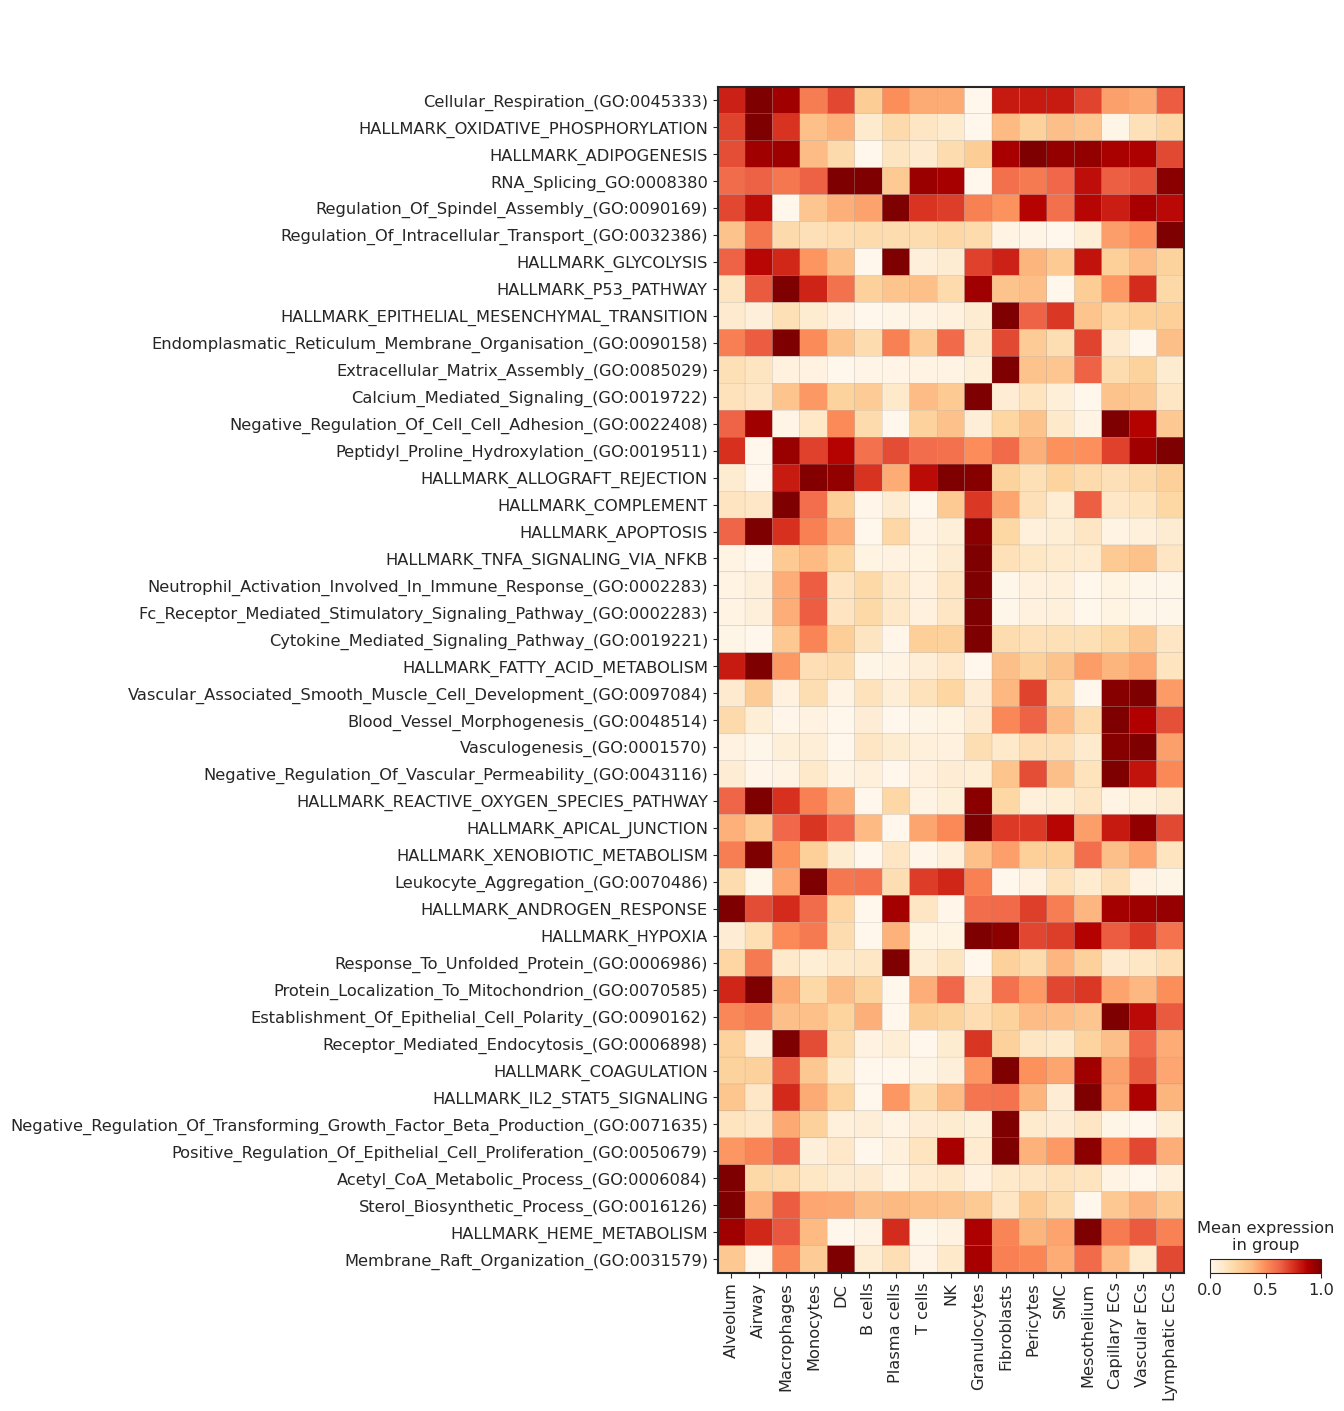

In [35]:
# Cluster 1
#Aerobic_Electron_Transport_Chain = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0019646"] mt-Co3
#Aerobic_Electron_Transport_Chain = Aerobic_Electron_Transport_Chain["SYMBOL"].values.tolist()
#Aerobic_Electron_Transport_Chain = list(set(Aerobic_Electron_Transport_Chain))
#sc.tl.score_genes(adata, gene_list = Aerobic_Electron_Transport_Chain, score_name = "Aerobic_Electron_Transport_Chain")

Cellular_Respiration = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0045333"]
Cellular_Respiration = Cellular_Respiration["SYMBOL"].values.tolist()
Cellular_Respiration = list(set(Cellular_Respiration))
sc.tl.score_genes(adata1, gene_list = Cellular_Respiration, score_name = "Cellular_Respiration_(GO:0045333)")

HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

# Cluster 2
RNA_Splicing = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0008380"]
RNA_Splicing = RNA_Splicing["SYMBOL"].values.tolist()
RNA_Splicing = list(set(RNA_Splicing))
sc.tl.score_genes(adata1, gene_list = RNA_Splicing, score_name = "RNA_Splicing_GO:0008380") 

Regulation_Of_Spindel_Assembly = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0090169"]
Regulation_Of_Spindel_Assembly = Regulation_Of_Spindel_Assembly["SYMBOL"].values.tolist()
Regulation_Of_Spindel_Assembly = list(set(Regulation_Of_Spindel_Assembly))
sc.tl.score_genes(adata1, gene_list = Regulation_Of_Spindel_Assembly, score_name = "Regulation_Of_Spindel_Assembly_(GO:0090169)")

Regulation_Of_Intracellular_Transport = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0032386"]
Regulation_Of_Intracellular_Transport = Regulation_Of_Intracellular_Transport["SYMBOL"].values.tolist()
Regulation_Of_Intracellular_Transport = list(set(Regulation_Of_Intracellular_Transport))
sc.tl.score_genes(adata1, gene_list = Regulation_Of_Intracellular_Transport, score_name = "Regulation_Of_Intracellular_Transport_(GO:0032386)")
                  
# Cluster 3
Endomplasmatic_Reticulum_Membrane_Organisation = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0090158"]
Endomplasmatic_Reticulum_Membrane_Organisation = Endomplasmatic_Reticulum_Membrane_Organisation["SYMBOL"].values.tolist()
Endomplasmatic_Reticulum_Membrane_Organisation = list(set(Endomplasmatic_Reticulum_Membrane_Organisation))
sc.tl.score_genes(adata1, gene_list = Endomplasmatic_Reticulum_Membrane_Organisation, score_name = "Endomplasmatic_Reticulum_Membrane_Organisation_(GO:0090158)")

Extracellular_Matrix_Assembly = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0085029"]
Extracellular_Matrix_Assembly = Extracellular_Matrix_Assembly["SYMBOL"].values.tolist()
Extracellular_Matrix_Assembly = list(set(Extracellular_Matrix_Assembly))
sc.tl.score_genes(adata1, gene_list = Extracellular_Matrix_Assembly, score_name = "Extracellular_Matrix_Assembly_(GO:0085029)")

Calcium_Mediated_Signaling = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0019722"]
Calcium_Mediated_Signaling = Calcium_Mediated_Signaling["SYMBOL"].values.tolist()
Calcium_Mediated_Signaling = list(set(Calcium_Mediated_Signaling))
sc.tl.score_genes(adata1, gene_list = Calcium_Mediated_Signaling, score_name = "Calcium_Mediated_Signaling_(GO:0019722)")

HALLMARK_GLYCOLYSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_GLYCOLYSIS"]
HALLMARK_GLYCOLYSIS = HALLMARK_GLYCOLYSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_GLYCOLYSIS, score_name = "HALLMARK_GLYCOLYSIS")

HALLMARK_P53_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_P53_PATHWAY"]
HALLMARK_P53_PATHWAY = HALLMARK_P53_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_P53_PATHWAY, score_name = "HALLMARK_P53_PATHWAY")

HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"]
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, score_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION")

# Cluster 4
Negative_Regulation_Of_Cell_Cell_Adhesion = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0022408"]
Negative_Regulation_Of_Cell_Cell_Adhesion = Negative_Regulation_Of_Cell_Cell_Adhesion["SYMBOL"].values.tolist()
Negative_Regulation_Of_Cell_Cell_Adhesion = list(set(Negative_Regulation_Of_Cell_Cell_Adhesion))
sc.tl.score_genes(adata1, gene_list = Negative_Regulation_Of_Cell_Cell_Adhesion, score_name = "Negative_Regulation_Of_Cell_Cell_Adhesion_(GO:0022408)")

Peptidyl_Proline_Hydroxylation = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0019511"]
Peptidyl_Proline_Hydroxylation = Peptidyl_Proline_Hydroxylation["SYMBOL"].values.tolist()
Peptidyl_Proline_Hydroxylation = list(set(Peptidyl_Proline_Hydroxylation))
sc.tl.score_genes(adata1, gene_list = Peptidyl_Proline_Hydroxylation, score_name = "Peptidyl_Proline_Hydroxylation_(GO:0019511)")

# Cluster 5
Neutrophil_Activation_Involved_In_Immune_Response = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0002283"]
Neutrophil_Activation_Involved_In_Immune_Response = Neutrophil_Activation_Involved_In_Immune_Response["SYMBOL"].values.tolist()
Neutrophil_Activation_Involved_In_Immune_Response = list(set(Neutrophil_Activation_Involved_In_Immune_Response))
sc.tl.score_genes(adata1, gene_list = Neutrophil_Activation_Involved_In_Immune_Response, score_name = "Neutrophil_Activation_Involved_In_Immune_Response_(GO:0002283)")

Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0002283"]
Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway["SYMBOL"].values.tolist()
Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway = list(set(Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway))
sc.tl.score_genes(adata1, gene_list = Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway, score_name = "Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway_(GO:0002283)")

Cytokine_Mediated_Signaling_Pathway = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0019221"]
Cytokine_Mediated_Signaling_Pathway = Cytokine_Mediated_Signaling_Pathway["SYMBOL"].values.tolist()
Cytokine_Mediated_Signaling_Pathway = list(set(Cytokine_Mediated_Signaling_Pathway))
sc.tl.score_genes(adata1, gene_list = Cytokine_Mediated_Signaling_Pathway, score_name = "Cytokine_Mediated_Signaling_Pathway_(GO:0019221)")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_COMPLEMENT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_COMPLEMENT"]
HALLMARK_COMPLEMENT = HALLMARK_COMPLEMENT["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_COMPLEMENT, score_name = "HALLMARK_COMPLEMENT")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

# Cluster 6
Vascular_Associated_Smooth_Muscle_Cell_Development = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0097084"]
Vascular_Associated_Smooth_Muscle_Cell_Development = Vascular_Associated_Smooth_Muscle_Cell_Development["SYMBOL"].values.tolist()
Vascular_Associated_Smooth_Muscle_Cell_Development = list(set(Vascular_Associated_Smooth_Muscle_Cell_Development))
sc.tl.score_genes(adata1, gene_list = Vascular_Associated_Smooth_Muscle_Cell_Development, score_name = "Vascular_Associated_Smooth_Muscle_Cell_Development_(GO:0097084)")

Blood_Vessel_Morphogenesis= c6_gene_table.loc[c6_gene_table["GO"] == "GO:0048514"]
Blood_Vessel_Morphogenesis = Blood_Vessel_Morphogenesis["SYMBOL"].values.tolist()
Blood_Vessel_Morphogenesis = list(set(Blood_Vessel_Morphogenesis))
sc.tl.score_genes(adata1, gene_list = Blood_Vessel_Morphogenesis, score_name = "Blood_Vessel_Morphogenesis_(GO:0048514)")

Vasculogenesis = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0001570"]
Vasculogenesis = Vasculogenesis["SYMBOL"].values.tolist()
Vasculogenesis = list(set(Vasculogenesis))
sc.tl.score_genes(adata1, gene_list = Vasculogenesis, score_name = "Vasculogenesis_(GO:0001570)")

Negative_Regulation_Of_Vascular_Permeability = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0043116"]
Negative_Regulation_Of_Vascular_Permeability = Negative_Regulation_Of_Vascular_Permeability["SYMBOL"].values.tolist()
Negative_Regulation_Of_Vascular_Permeability = list(set(Negative_Regulation_Of_Vascular_Permeability))
sc.tl.score_genes(adata1, gene_list = Negative_Regulation_Of_Vascular_Permeability, score_name = "Negative_Regulation_Of_Vascular_Permeability_(GO:0043116)")

HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_APICAL_JUNCTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APICAL_JUNCTION"]
HALLMARK_APICAL_JUNCTION = HALLMARK_APICAL_JUNCTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_APICAL_JUNCTION, score_name = "HALLMARK_APICAL_JUNCTION")


# Cluster 7
Leukocyte_Aggregation = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0070486"]
Leukocyte_Aggregation = Leukocyte_Aggregation["SYMBOL"].values.tolist()
Leukocyte_Aggregation = list(set(Leukocyte_Aggregation))
sc.tl.score_genes(adata1, gene_list = Leukocyte_Aggregation, score_name = "Leukocyte_Aggregation_(GO:0070486)")

HALLMARK_APOPTOSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APOPTOSIS"]
HALLMARK_APOPTOSIS = HALLMARK_APOPTOSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_APOPTOSIS")

HALLMARK_TNFA_SIGNALING_VIA_NFKB = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_TNFA_SIGNALING_VIA_NFKB"]
HALLMARK_TNFA_SIGNALING_VIA_NFKB = HALLMARK_TNFA_SIGNALING_VIA_NFKB["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_TNFA_SIGNALING_VIA_NFKB, score_name = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")

# Cluster 8
HALLMARK_XENOBIOTIC_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_XENOBIOTIC_METABOLISM"]
HALLMARK_XENOBIOTIC_METABOLISM = HALLMARK_XENOBIOTIC_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_XENOBIOTIC_METABOLISM, score_name = "HALLMARK_XENOBIOTIC_METABOLISM")

HALLMARK_ANDROGEN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ANDROGEN_RESPONSE"]
HALLMARK_ANDROGEN_RESPONSE = HALLMARK_ANDROGEN_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_ANDROGEN_RESPONSE, score_name = "HALLMARK_ANDROGEN_RESPONSE")

HALLMARK_HYPOXIA = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_HYPOXIA"]
HALLMARK_HYPOXIA = HALLMARK_HYPOXIA["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_HYPOXIA, score_name = "HALLMARK_HYPOXIA")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

# Cluster 9
Response_To_Unfolded_Protein = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0006986"]
Response_To_Unfolded_Protein = Response_To_Unfolded_Protein["SYMBOL"].values.tolist()
Response_To_Unfolded_Protein = list(set(Response_To_Unfolded_Protein))
sc.tl.score_genes(adata1, gene_list = Response_To_Unfolded_Protein, score_name = "Response_To_Unfolded_Protein_(GO:0006986)")

Protein_Localization_To_Mitochondrion = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0070585"]
Protein_Localization_To_Mitochondrion = Protein_Localization_To_Mitochondrion["SYMBOL"].values.tolist()
Protein_Localization_To_Mitochondrion = list(set(Protein_Localization_To_Mitochondrion))
sc.tl.score_genes(adata1, gene_list = Protein_Localization_To_Mitochondrion, score_name = "Protein_Localization_To_Mitochondrion_(GO:0070585)")

Establishment_Of_Epithelial_Cell_Polarity = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0090162"]
Establishment_Of_Epithelial_Cell_Polarity = Establishment_Of_Epithelial_Cell_Polarity["SYMBOL"].values.tolist()
Establishment_Of_Epithelial_Cell_Polarity = list(set(Establishment_Of_Epithelial_Cell_Polarity))
sc.tl.score_genes(adata1, gene_list = Establishment_Of_Epithelial_Cell_Polarity, score_name = "Establishment_Of_Epithelial_Cell_Polarity_(GO:0090162)")

# Cluster 10
Receptor_Mediated_Endocytosis = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0006898"]
Receptor_Mediated_Endocytosis = Receptor_Mediated_Endocytosis["SYMBOL"].values.tolist()
Receptor_Mediated_Endocytosis = list(set(Receptor_Mediated_Endocytosis))
sc.tl.score_genes(adata1, gene_list = Receptor_Mediated_Endocytosis, score_name = "Receptor_Mediated_Endocytosis_(GO:0006898)")

Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0071635"]
Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production["SYMBOL"].values.tolist()
Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production = list(set(Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production))
sc.tl.score_genes(adata1, gene_list = Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production, score_name = "Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production_(GO:0071635)")

Positive_Regulation_Of_Epithelial_Cell_Proliferation = c10_gene_table.loc[c10_gene_table["GO"] == "GO:0050679"]
Positive_Regulation_Of_Epithelial_Cell_Proliferation = Positive_Regulation_Of_Epithelial_Cell_Proliferation["SYMBOL"].values.tolist()
Positive_Regulation_Of_Epithelial_Cell_Proliferation = list(set(Positive_Regulation_Of_Epithelial_Cell_Proliferation))
sc.tl.score_genes(adata1, gene_list = Positive_Regulation_Of_Epithelial_Cell_Proliferation, score_name = "Positive_Regulation_Of_Epithelial_Cell_Proliferation_(GO:0050679)")

HALLMARK_COAGULATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_COAGULATION"]
HALLMARK_COAGULATION = HALLMARK_COAGULATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_COAGULATION, score_name = "HALLMARK_COAGULATION")

HALLMARK_IL2_STAT5_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_IL2_STAT5_SIGNALING"]
HALLMARK_IL2_STAT5_SIGNALING = HALLMARK_IL2_STAT5_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_IL2_STAT5_SIGNALING, score_name = "HALLMARK_IL2_STAT5_SIGNALING")

# Cluster 11
Acetyl_CoA_Metabolic_Process = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0006084"]
Acetyl_CoA_Metabolic_Process = Acetyl_CoA_Metabolic_Process["SYMBOL"].values.tolist()
Acetyl_CoA_Metabolic_Process = list(set(Acetyl_CoA_Metabolic_Process))
sc.tl.score_genes(adata1, gene_list = Acetyl_CoA_Metabolic_Process, score_name = "Acetyl_CoA_Metabolic_Process_(GO:0006084)")

Sterol_Biosynthetic_Process = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0016126"]
Sterol_Biosynthetic_Process = Sterol_Biosynthetic_Process["SYMBOL"].values.tolist()
Sterol_Biosynthetic_Process = list(set(Sterol_Biosynthetic_Process))
sc.tl.score_genes(adata1, gene_list = Sterol_Biosynthetic_Process, score_name = "Sterol_Biosynthetic_Process_(GO:0016126)")

Membrane_Raft_Organization = c11_gene_table.loc[c11_gene_table["GO"] == "GO:0031579"]
Membrane_Raft_Organization = Membrane_Raft_Organization["SYMBOL"].values.tolist()
Membrane_Raft_Organization = list(set(Membrane_Raft_Organization))
sc.tl.score_genes(adata1, gene_list = Membrane_Raft_Organization, score_name = "Membrane_Raft_Organization_(GO:0031579)")

HALLMARK_ADIPOGENESIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ADIPOGENESIS"]
HALLMARK_ADIPOGENESIS = HALLMARK_ADIPOGENESIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_ADIPOGENESIS, score_name = "HALLMARK_ADIPOGENESIS")

HALLMARK_HEME_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_HEME_METABOLISM"]
HALLMARK_HEME_METABOLISM = HALLMARK_HEME_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_HEME_METABOLISM, score_name = "HALLMARK_HEME_METABOLISM")

HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY, score_name = "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY")

HALLMARK_FATTY_ACID_METABOLISM = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_FATTY_ACID_METABOLISM"]
HALLMARK_FATTY_ACID_METABOLISM = HALLMARK_FATTY_ACID_METABOLISM["gene_symbol"].values.tolist()
sc.tl.score_genes(adata1, gene_list = HALLMARK_FATTY_ACID_METABOLISM, score_name = "HALLMARK_FATTY_ACID_METABOLISM")

sc.pl.matrixplot(adata1, groupby=["meta_label"], 


              var_names=["Cellular_Respiration_(GO:0045333)", "HALLMARK_OXIDATIVE_PHOSPHORYLATION", "HALLMARK_ADIPOGENESIS",
                         "RNA_Splicing_GO:0008380", "Regulation_Of_Spindel_Assembly_(GO:0090169)", "Regulation_Of_Intracellular_Transport_(GO:0032386)",
                         "HALLMARK_GLYCOLYSIS", "HALLMARK_P53_PATHWAY", "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION","Endomplasmatic_Reticulum_Membrane_Organisation_(GO:0090158)", "Extracellular_Matrix_Assembly_(GO:0085029)", "Calcium_Mediated_Signaling_(GO:0019722)", 
                         "Negative_Regulation_Of_Cell_Cell_Adhesion_(GO:0022408)", "Peptidyl_Proline_Hydroxylation_(GO:0019511)",
                         "HALLMARK_ALLOGRAFT_REJECTION",  "HALLMARK_COMPLEMENT", "HALLMARK_APOPTOSIS","HALLMARK_TNFA_SIGNALING_VIA_NFKB","Neutrophil_Activation_Involved_In_Immune_Response_(GO:0002283)", "Fc_Receptor_Mediated_Stimulatory_Signaling_Pathway_(GO:0002283)", "Cytokine_Mediated_Signaling_Pathway_(GO:0019221)", "HALLMARK_FATTY_ACID_METABOLISM", 
                         "Vascular_Associated_Smooth_Muscle_Cell_Development_(GO:0097084)", "Blood_Vessel_Morphogenesis_(GO:0048514)", "Vasculogenesis_(GO:0001570)", "Negative_Regulation_Of_Vascular_Permeability_(GO:0043116)", "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY", "HALLMARK_APICAL_JUNCTION", "HALLMARK_XENOBIOTIC_METABOLISM",
                         "Leukocyte_Aggregation_(GO:0070486)",
                         "HALLMARK_ANDROGEN_RESPONSE", "HALLMARK_HYPOXIA",
                         "Response_To_Unfolded_Protein_(GO:0006986)", "Protein_Localization_To_Mitochondrion_(GO:0070585)", "Establishment_Of_Epithelial_Cell_Polarity_(GO:0090162)",
                         "Receptor_Mediated_Endocytosis_(GO:0006898)", "HALLMARK_COAGULATION","HALLMARK_IL2_STAT5_SIGNALING","Negative_Regulation_Of_Transforming_Growth_Factor_Beta_Production_(GO:0071635)", "Positive_Regulation_Of_Epithelial_Cell_Proliferation_(GO:0050679)",
                         "Acetyl_CoA_Metabolic_Process_(GO:0006084)", "Sterol_Biosynthetic_Process_(GO:0016126)", "HALLMARK_HEME_METABOLISM",  "Membrane_Raft_Organization_(GO:0031579)",
                       ],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd",  
                save = "cluster_all_d37_only_msigdb_and_go_pathway_scores.pdf")
